In [ ]:
%pip install matplotlib
%pip install control

## 7.6

### Resposta ao degrau com Kp = 885,5, KD = 0 e KI = 0. (b) O lugar geométrico da raiz mostrando Kp = 885,5 resulta em estabilidade marginal com $s = +-7,5j$.


c:\Users\ismae\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\config.py:363: FutureWarning: keyword 'kvect' is deprecated; use 'gains'
  warnings.warn(
c:\Users\ismae\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(


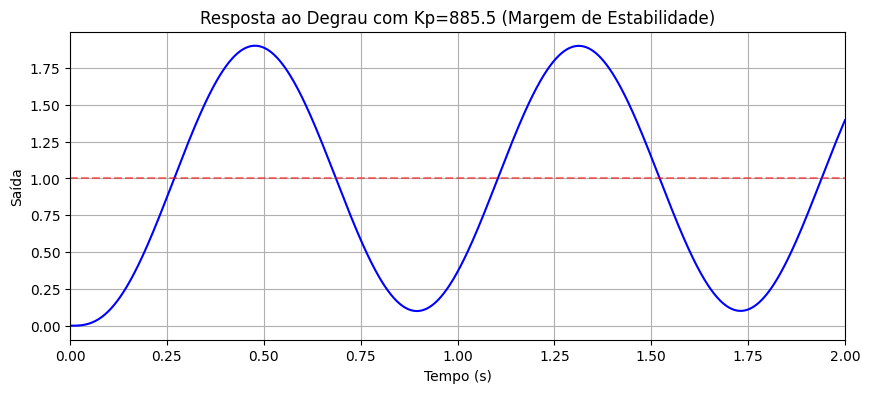

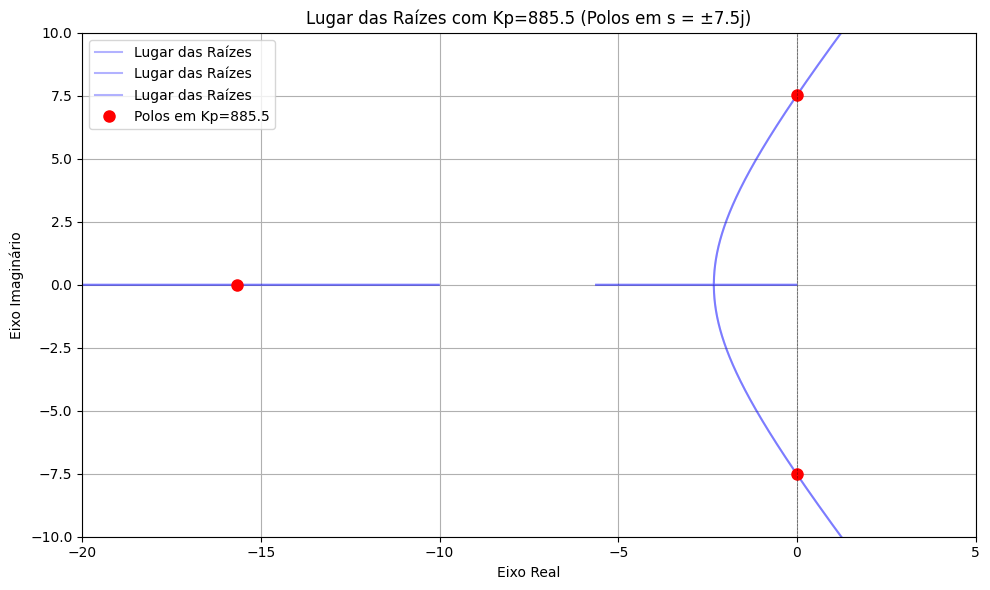

In [1]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

num = [1]
den = [1, 15.66, 56.6, 0]  
G = ct.tf(num, den)

Kp = 885.5
Ki = 0
Kd = 0

C = ct.tf([Kd, Kp, Ki], [1, 0])  

sys_cl = ct.feedback(C * G, 1)

t, y = ct.step_response(sys_cl, T=np.linspace(0, 2, 1000))

plt.figure(figsize=(10, 4))
plt.plot(t, y, 'b')
plt.title('Resposta ao Degrau com Kp=885.5 (Margem de Estabilidade)')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída')
plt.grid(True)
plt.axhline(1, color='r', linestyle='--', alpha=0.5)
plt.xlim([0, 2])

plt.figure(figsize=(10, 6))

rlocus = ct.root_locus(G, kvect=np.logspace(0, 4, 10000), grid=False, plot=False)

plt.plot(rlocus[0].real, rlocus[0].imag, 'b', alpha=0.3, label='Lugar das Raízes')
plt.plot(rlocus[0].real, -rlocus[0].imag, 'b', alpha=0.3)

sys_cl_885 = ct.feedback(Kp * G, 1)
poles = sys_cl_885.poles()

plt.plot(poles.real, poles.imag, 'ro', markersize=8, label='Polos em Kp=885.5')
plt.plot([0, 0], [-10, 10], 'k--', linewidth=0.5, alpha=0.5)  # Eixo imaginário
plt.title('Lugar das Raízes com Kp=885.5 (Polos em s = ±7.5j)')
plt.xlabel('Eixo Real')
plt.ylabel('Eixo Imaginário')
plt.legend()
plt.grid(True)
plt.axis([-20, 5, -10, 10])

plt.tight_layout()
plt.show()

### Resposta ao degrau com Kp = 370 mostrando o decaimento da amplitude de um quarto.

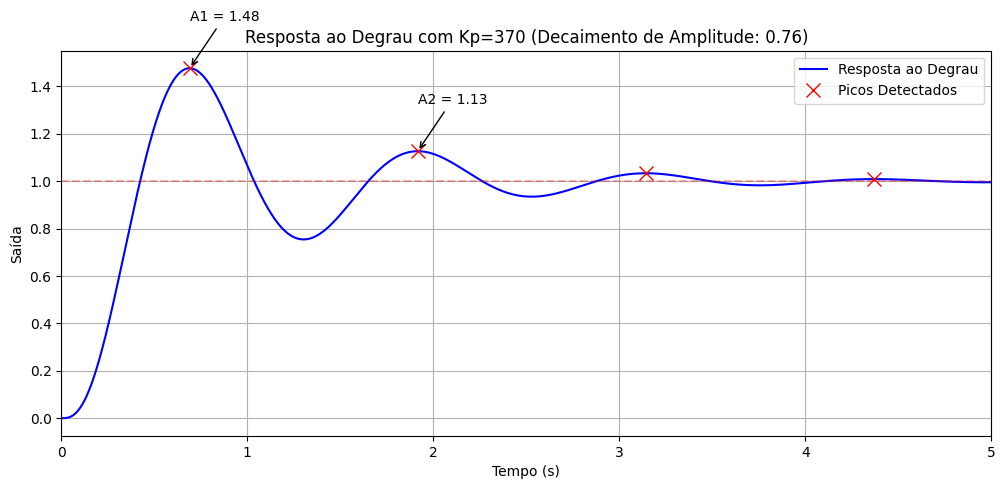

In [3]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

num = [1]
den = [1, 15.66, 56.6, 0]  
G = ct.tf(num, den)

Kp = 370
Ki = 0
Kd = 0

C = ct.tf([Kd, Kp, Ki], [1, 0]) 

sys_cl = ct.feedback(C * G, 1)

t, y = ct.step_response(sys_cl, T=np.linspace(0, 5, 5000))

peaks, _ = find_peaks(y, height=0.2)  

if len(peaks) >= 2:
    A1 = y[peaks[0]]  
    A2 = y[peaks[1]]  
    decay_ratio = A2 / A1
else:
    decay_ratio = 0

plt.figure(figsize=(12, 5))
plt.plot(t, y, 'b', label='Resposta ao Degrau')
plt.plot(t[peaks], y[peaks], 'rx', markersize=10, label='Picos Detectados')

plt.title(f'Resposta ao Degrau com Kp=370 (Decaimento de Amplitude: {decay_ratio:.2f})')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída')
plt.grid(True)
plt.axhline(1, color='r', linestyle='--', alpha=0.3)

if len(peaks) >= 2:
    plt.annotate(f'A1 = {A1:.2f}', xy=(t[peaks[0]], A1), xytext=(t[peaks[0]], A1 + 0.2),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))
    plt.annotate(f'A2 = {A2:.2f}', xy=(t[peaks[1]], A2), xytext=(t[peaks[1]], A2 + 0.2),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.legend()
plt.xlim([0, 5])
plt.show()

### Lugar geométrico da raiz para Kp = 370, KI = 0 e 0 < KD < ∞.

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


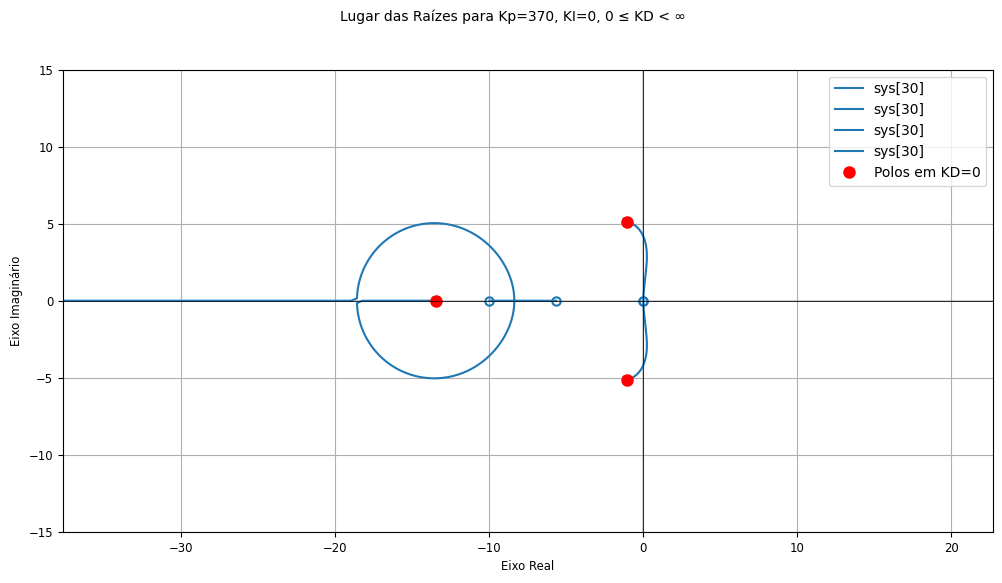

In [4]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

num = [1]
den = [1, 15.66, 56.6, 0]  
G = ct.tf(num, den)

Kp = 370
Ki = 0

s = ct.tf([1, 0], [1])
numerator = s * G.num[0][0]      
denominator = 1 + Kp * G          
G_rlocus = numerator / denominator

plt.figure(figsize=(12, 6))
rlocus_data = ct.root_locus(
    G_rlocus,
    kvect=np.logspace(-2, 4, 10000),  
    grid=False,
    plot=True,
    title=f'Lugar das Raízes para Kp=370, KI=0, 0 ≤ KD < ∞'
)

sys_cl_kd0 = ct.feedback(Kp * G, 1)
poles_kd0 = sys_cl_kd0.poles()
plt.plot(poles_kd0.real, poles_kd0.imag, 'ro', markersize=8, label='Polos em KD=0')

plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.xlabel('Eixo Real')
plt.ylabel('Eixo Imaginário')
plt.legend()
plt.grid(True)
plt.axis([-20, 5, -15, 15])  
plt.show()

### Porcentagem de ultrapassagem e tempo de estabilização com Kp = 370, KI = 0 e 5 <= KD < 75.

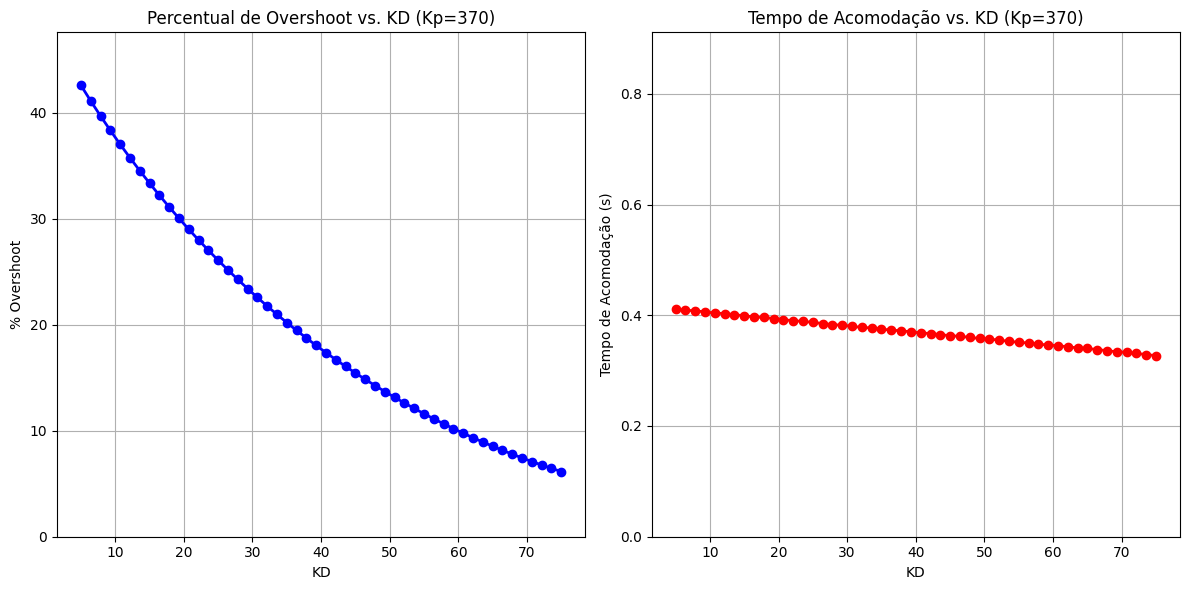

In [5]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

num = [1]
den = [1, 15.66, 56.6, 0] 
G = ct.tf(num, den)

Kp = 370
Ki = 0
Kd_values = np.linspace(5, 75, 50)  

overshoots = []
settling_times = []

for Kd in Kd_values:
    C = ct.tf([Kd, Kp, Ki], [1, 0])  
    
    sys_cl = ct.feedback(C * G, 1)
    
    t, y = ct.step_response(sys_cl, T=np.linspace(0, 5, 5000))
    
    y_ss = y[-1] 
    if y_ss == 0:
        y_ss = 1e-6  
    peak_idx, _ = find_peaks(y, height=0.1*y_ss)
    if len(peak_idx) > 0:
        y_max = np.max(y[peak_idx])
        PO = 100 * (y_max - y_ss) / y_ss
    else:
        PO = 0  
    overshoots.append(PO)
    
    y_target = 0.98 * y_ss
    settled = np.where(np.abs(y - y_ss) <= 0.02 * np.abs(y_ss))[0]
    if len(settled) > 0:
        Ts = t[settled[0]]
    else:
        Ts = t[-1] 
    settling_times.append(Ts)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(Kd_values, overshoots, 'bo-', linewidth=2, markersize=6)
plt.title('Percentual de Overshoot vs. KD (Kp=370)')
plt.xlabel('KD')
plt.ylabel('% Overshoot')
plt.grid(True)
plt.ylim(0, max(overshoots)+5)

plt.subplot(1, 2, 2)
plt.plot(Kd_values, settling_times, 'ro-', linewidth=2, markersize=6)
plt.title('Tempo de Acomodação vs. KD (Kp=370)')
plt.xlabel('KD')
plt.ylabel('Tempo de Acomodação (s)')
plt.grid(True)
plt.ylim(0, max(settling_times)+0.5)

plt.tight_layout()
plt.show()

### Lugar geométrico da raiz para Kp = 370, KD = 0, 0 <= KI < ∞.


c:\Users\ismae\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\config.py:363: FutureWarning: keyword 'kvect' is deprecated; use 'gains'
  warnings.warn(
c:\Users\ismae\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


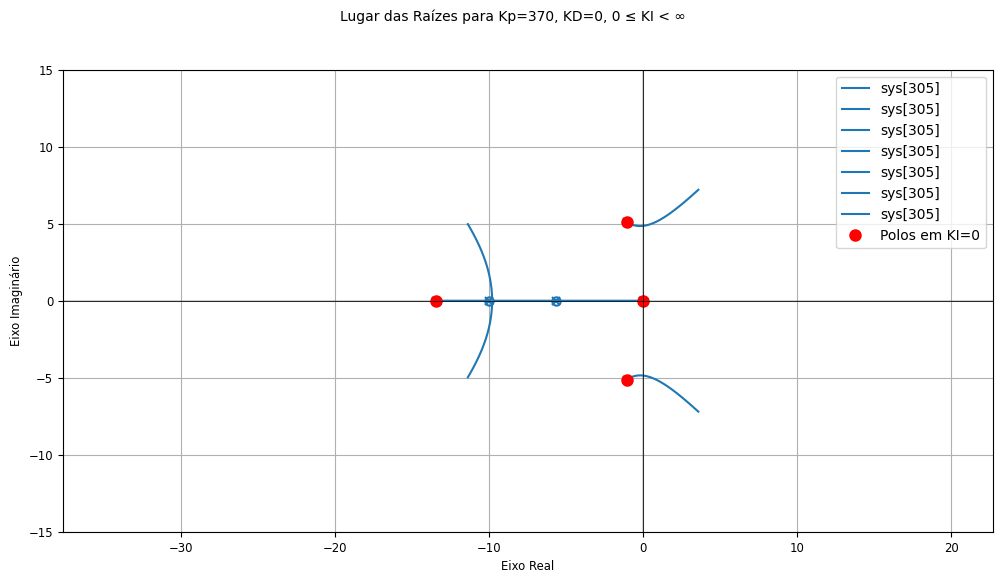

In [7]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

num = [1]
den = [1, 15.66, 56.6, 0]  
G = ct.tf(num, den)

Kp = 370
Kd = 0

s = ct.tf([1, 0], [1]) 
G_rs = G / s             
feedback_part = 1 + Kp * G  
G_rlocus = G_rs / feedback_part  

plt.figure(figsize=(12, 6))
rlocus_data = ct.root_locus(
    G_rlocus,
    kvect=np.logspace(-2, 4, 10000),  
    grid=False,
    plot=True,
    title=f'Lugar das Raízes para Kp=370, KD=0, 0 ≤ KI < ∞'
)

sys_cl_ki0 = ct.feedback(Kp * G, 1)
poles_ki0 = sys_cl_ki0.poles()
plt.plot(poles_ki0.real, poles_ki0.imag, 'ro', markersize=8, label='Polos em KI=0')

plt.plot(0, 0, 'ro', markersize=8)  

plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.xlabel('Eixo Real')
plt.ylabel('Eixo Imaginário')
plt.legend()
plt.grid(True)
plt.axis([-20, 5, -15, 15])  
plt.show()

### Porcentagem de ultrapassagem e tempo de estabilização com Kp = 370, KD = 0 e 50 <= KI < 600.


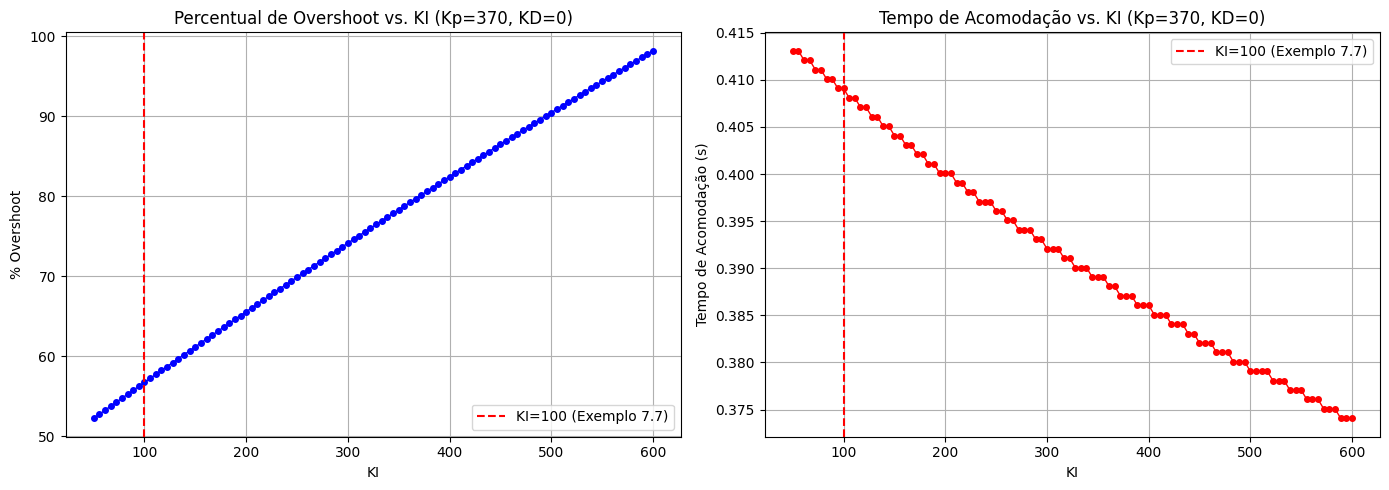

In [8]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

num = [1]
den = [1, 15.66, 56.6, 0]  
G = ct.tf(num, den)

Kp = 370
Kd = 0
Ki_values = np.linspace(50, 600, 100)  

overshoots = []
settling_times = []

for Ki in Ki_values:
    C = ct.tf([Kd, Kp, Ki], [1, 0])  
    
    sys_cl = ct.feedback(C * G, 1)
    
    t, y = ct.step_response(sys_cl, T=np.linspace(0, 5, 5000))
    
    y_ss = 1.0  
    if len(y) == 0:
        overshoots.append(np.nan)
        settling_times.append(np.nan)
        continue
    
    peak_idx, _ = find_peaks(y, height=0.1*y_ss)
    if len(peak_idx) > 0:
        y_max = np.max(y[peak_idx])
        PO = 100 * (y_max - y_ss) / y_ss
    else:
        PO = 0
    overshoots.append(PO)
    
    try:
        settled_idx = np.where((y >= 0.98*y_ss) & (y <= 1.02*y_ss))[0]
        if len(settled_idx) > 0:
            Ts = t[settled_idx[0]]
        else:
            Ts = t[-1]  
    except:
        Ts = np.nan
    settling_times.append(Ts)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(Ki_values, overshoots, 'bo-', linewidth=1, markersize=4)
plt.title('Percentual de Overshoot vs. KI (Kp=370, KD=0)')
plt.xlabel('KI')
plt.ylabel('% Overshoot')
plt.grid(True)
plt.axvline(100, color='r', linestyle='--', label='KI=100 (Exemplo 7.7)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Ki_values, settling_times, 'ro-', linewidth=1, markersize=4)
plt.title('Tempo de Acomodação vs. KI (Kp=370, KD=0)')
plt.xlabel('KI')
plt.ylabel('Tempo de Acomodação (s)')
plt.grid(True)
plt.axvline(100, color='r', linestyle='--', label='KI=100 (Exemplo 7.7)')
plt.legend()

plt.tight_layout()
plt.show()

### Porcentagem de ultrapassagem e tempo de acomodação com projeto final Kp = 370, KD = 60 e KI = 100.

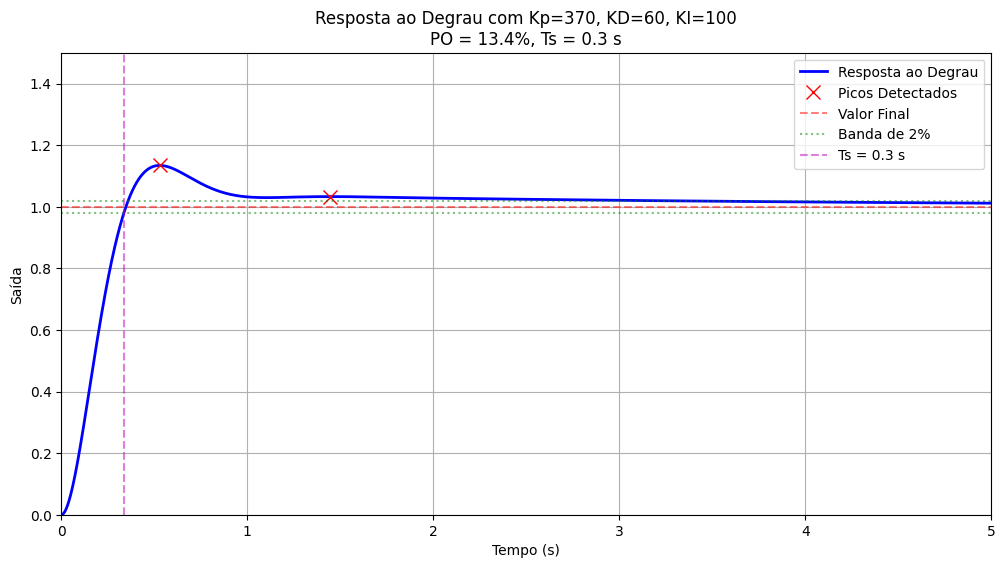

In [10]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

num = [1]
den = [1, 15.66, 56.6, 0] 
G = ct.tf(num, den)

Kp = 370
Kd = 60
Ki = 100

C = ct.tf([Kd, Kp, Ki], [1, 0])  

sys_cl = ct.feedback(C * G, 1)

t, y = ct.step_response(sys_cl, T=np.linspace(0, 5, 5000))

y_ss = 1.0 

peak_idx, _ = find_peaks(y, height=0.1*y_ss)
if len(peak_idx) > 0:
    y_max = np.max(y[peak_idx])
    PO = 100 * (y_max - y_ss) / y_ss
else:
    PO = 0

settled_mask = (y >= 0.98*y_ss) & (y <= 1.02*y_ss)
settled_indices = np.where(settled_mask)[0]
if len(settled_indices) > 0:
    Ts = t[settled_indices[0]]
else:
    Ts = t[-1]

plt.figure(figsize=(12, 6))
plt.plot(t, y, 'b', linewidth=2, label='Resposta ao Degrau')
plt.plot(t[peak_idx], y[peak_idx], 'rx', markersize=10, label='Picos Detectados')

plt.title(f'Resposta ao Degrau com Kp=370, KD=60, KI=100\n'
          f'PO = {PO:.1f}%, Ts = {Ts:.1f} s')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída')
plt.grid(True)

plt.axhline(y_ss, color='r', linestyle='--', alpha=0.5, label='Valor Final')
plt.axhline(1.02*y_ss, color='g', linestyle=':', alpha=0.5, label='Banda de 2%')
plt.axhline(0.98*y_ss, color='g', linestyle=':', alpha=0.5)
plt.axvline(Ts, color='m', linestyle='--', alpha=0.5, label=f'Ts = {Ts:.1f} s')

plt.legend()
plt.xlim([0, 5])
plt.ylim([0, 1.5])
plt.show()

### Resposta de tempo para o ajuste PID Ziegler–Nichols com Kp = 531,3, KI = 1280,2 e KD = 55,1.

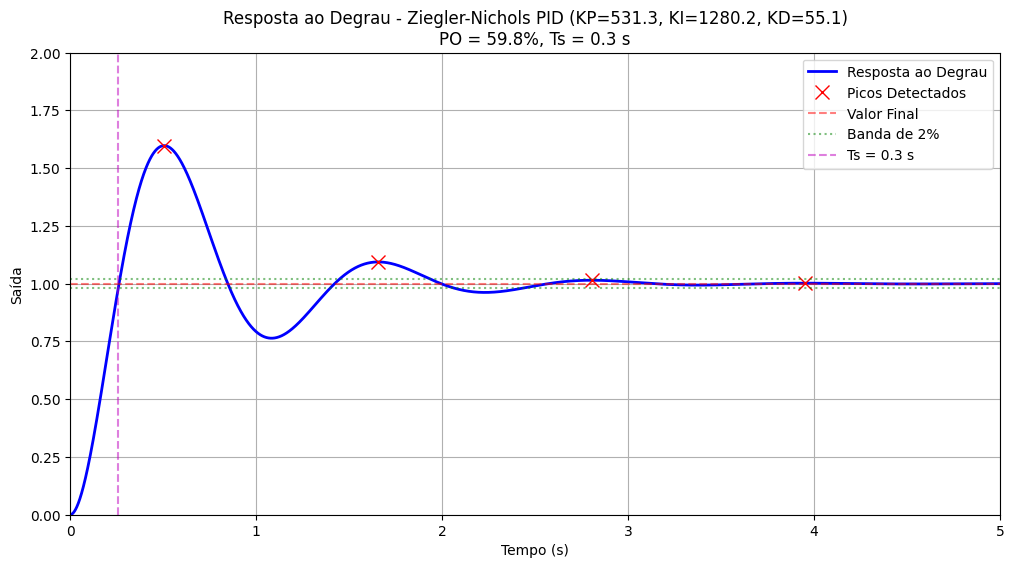

In [17]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

num = [1]
den = [1, 15.66, 56.6, 0]  
G = ct.tf(num, den)

Kp = 531.3
Ki = 1280.2
Kd = 55.1

C = ct.tf([Kd, Kp, Ki], [1, 0]) 

sys_cl = ct.feedback(C * G, 1)

t, y = ct.step_response(sys_cl, T=np.linspace(0, 5, 5000))

y_ss = 1.0  

peak_idx, _ = find_peaks(y, height=0.1*y_ss)
if len(peak_idx) > 0:
    y_max = np.max(y[peak_idx])
    PO = 100 * (y_max - y_ss) / y_ss
else:
    PO = 0

settled_mask = (y >= 0.98*y_ss) & (y <= 1.02*y_ss)
settled_indices = np.where(settled_mask)[0]
if len(settled_indices) > 0:
    Ts = t[settled_indices[0]]
else:
    Ts = t[-1]

plt.figure(figsize=(12, 6))
plt.plot(t, y, 'b', linewidth=2, label='Resposta ao Degrau')
plt.plot(t[peak_idx], y[peak_idx], 'rx', markersize=10, label='Picos Detectados')

plt.title(f'Resposta ao Degrau - Ziegler-Nichols PID (KP=531.3, KI=1280.2, KD=55.1)\n'
          f'PO = {PO:.1f}%, Ts = {Ts:.1f} s')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída')
plt.grid(True)

plt.axhline(y_ss, color='r', linestyle='--', alpha=0.5, label='Valor Final')
plt.axhline(1.02*y_ss, color='g', linestyle=':', alpha=0.5, label='Banda de 2%')
plt.axhline(0.98*y_ss, color='g', linestyle=':', alpha=0.5)
plt.axvline(Ts, color='m', linestyle='--', alpha=0.5, label=f'Ts = {Ts:.1f} s')

plt.legend()
plt.xlim([0, 5])
plt.ylim([0, 2.0])  
plt.show()

### Curva de reação ilustrando os parâmetros R e ∆T necessários para o método de ajuste de malha aberta de Ziegler-Nichols.

Parâmetros extraídos:
ΔT = 0.02 s
R = 0.59

Ganhos PID calculados:
Kp = 101.99
Ki = 2547.30
Kd = 0.02


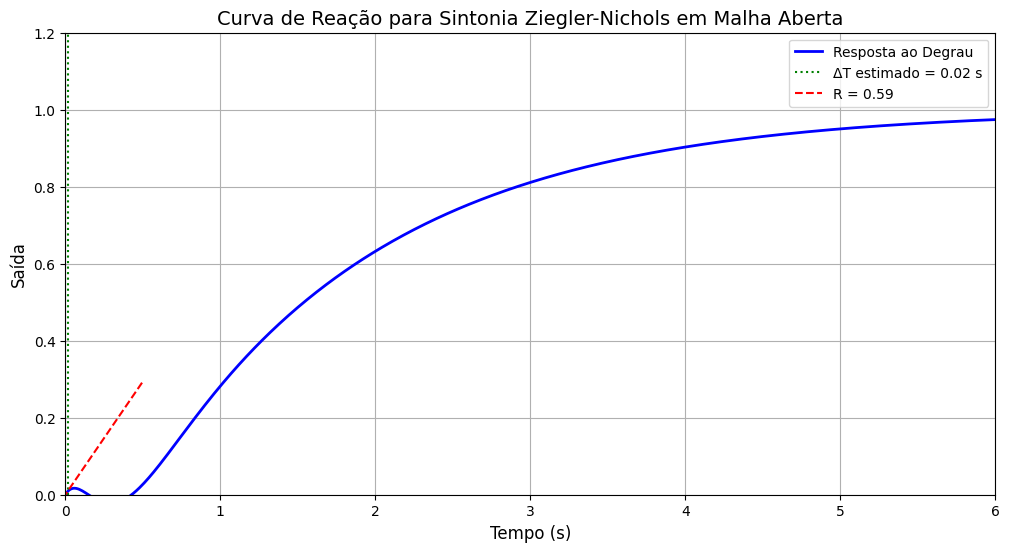

In [20]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

M = 1.0    
tau = 1.5    
DeltaT = 0.5  

num_first_order = [M]
den_first_order = [tau, 1]
G_first_order = ct.tf(num_first_order, den_first_order)

num_delay, den_delay = ct.pade(DeltaT, 2)  
G_delay = ct.tf(num_delay, den_delay)   

G = G_first_order * G_delay 

t, y = ct.step_response(G, T=np.linspace(0, 10, 1000))

y_ss = M  
threshold = 0.01 * y_ss
DeltaT_estimated = t[np.where(y > threshold)[0][0]]

dy = np.gradient(y, t) 
R = np.max(dy)

plt.figure(figsize=(12, 6))

plt.plot(t, y, 'b', linewidth=2, label='Resposta ao Degrau')

plt.axvline(DeltaT_estimated, color='g', linestyle=':', 
           label=f'ΔT estimado = {DeltaT_estimated:.2f} s')

max_slope_idx = np.argmax(dy)
t_tangent = np.linspace(t[max_slope_idx]-0.5, t[max_slope_idx]+0.5, 100)
y_tangent = y[max_slope_idx] + R*(t_tangent - t[max_slope_idx])
plt.plot(t_tangent, y_tangent, 'r--', label=f'R = {R:.2f}')

plt.title('Curva de Reação para Sintonia Ziegler-Nichols em Malha Aberta', fontsize=14)
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Saída', fontsize=12)
plt.legend()
plt.grid(True)
plt.xlim(0, 6)
plt.ylim(0, 1.2)

Kp = 1.2 / (R * DeltaT_estimated)
Ki = 0.6 / (R * DeltaT_estimated**2)
Kd = 0.6 * DeltaT_estimated / R

print(f'Parâmetros extraídos:')
print(f'ΔT = {DeltaT_estimated:.2f} s')
print(f'R = {R:.2f}')
print(f'\nGanhos PID calculados:')
print(f'Kp = {Kp:.2f}')
print(f'Ki = {Ki:.2f}')
print(f'Kd = {Kd:.2f}')

plt.show()

### Curva de reação com Td = 0,1 s e R = 0,8.


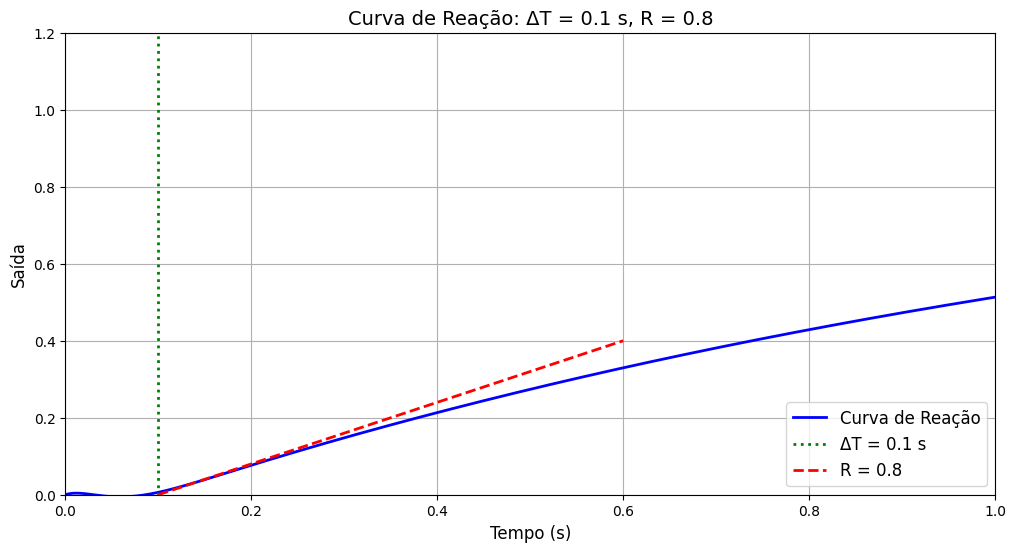

Ganhos PID calculados (Ziegler-Nichols aberto):
Kp = 15.00
Ki = 75.00
Kd = 0.07


In [21]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

DeltaT = 0.1
R = 0.8     
M = 1.0     

tau = M / R

G_first_order = ct.tf([M], [tau, 1])

num_delay, den_delay = ct.pade(DeltaT, 2)  
G_delay = ct.tf(num_delay, den_delay)

G = G_first_order * G_delay

t, y = ct.step_response(G, T=np.linspace(0, 2, 1000))

plt.figure(figsize=(12, 6))
plt.plot(t, y, 'b', linewidth=2, label='Curva de Reação')

plt.axvline(DeltaT, color='g', linestyle=':', linewidth=2, label=f'ΔT = {DeltaT} s')

t_tangent = np.linspace(DeltaT, DeltaT + 0.5, 100)
y_tangent = R * (t_tangent - DeltaT)
plt.plot(t_tangent, y_tangent, 'r--', linewidth=2, label=f'R = {R}')

plt.title(f'Curva de Reação: ΔT = {DeltaT} s, R = {R}', fontsize=14)
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Saída', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(0, 1.2)
plt.show()

### Resposta temporal para o ajuste de PI de Ziegler-Nichols com Kp = 11,25 e KI = 33,75.

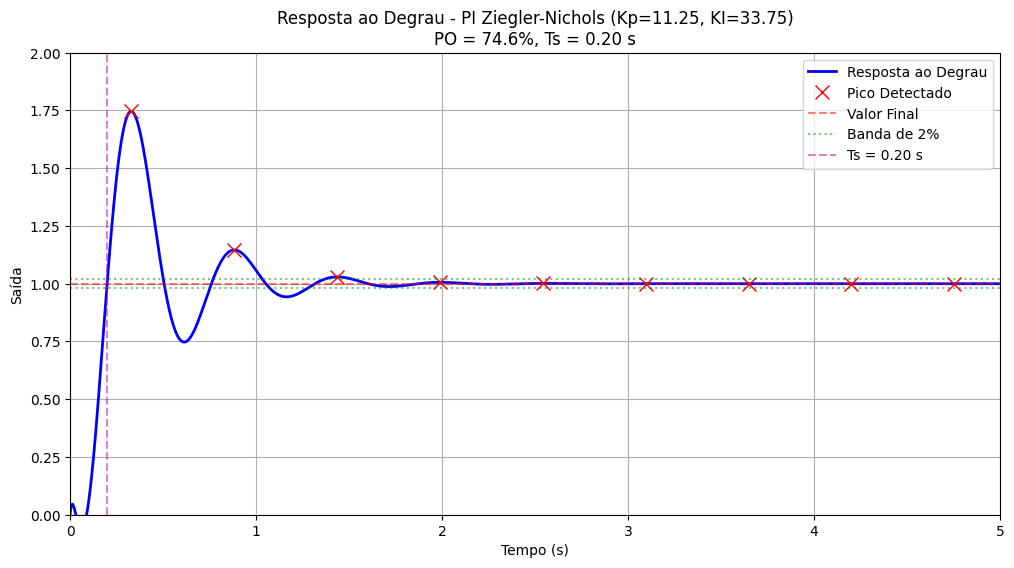

In [23]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

M = 1.0      
DeltaT = 0.1 
R = 0.8      
tau = M / R  

G_first_order = ct.tf([M], [tau, 1])

num_delay, den_delay = ct.pade(DeltaT, 2)
G_delay = ct.tf(num_delay, den_delay)

G = G_first_order * G_delay

Kp = 11.25
KI = 33.75

C = ct.tf([Kp, KI], [1, 0])  

sys_cl = ct.feedback(C * G, 1)

t, y = ct.step_response(sys_cl, T=np.linspace(0, 5, 5000))

y_ss = 1.0 

peak_idx, _ = find_peaks(y, height=0.1*y_ss)
if len(peak_idx) > 0:
    y_max = y[peak_idx[0]]
    PO = 100 * (y_max - y_ss) / y_ss
else:
    PO = 0

settled_mask = (y >= 0.98*y_ss) & (y <= 1.02*y_ss)
settled_indices = np.where(settled_mask)[0]
Ts = t[settled_indices[0]] if len(settled_indices) > 0 else t[-1]

plt.figure(figsize=(12, 6))
plt.plot(t, y, 'b', linewidth=2, label='Resposta ao Degrau')
plt.plot(t[peak_idx], y[peak_idx], 'rx', markersize=10, label='Pico Detectado')

plt.axhline(y_ss, color='r', linestyle='--', alpha=0.5, label='Valor Final')
plt.axhline(1.02*y_ss, color='g', linestyle=':', alpha=0.5, label='Banda de 2%')
plt.axhline(0.98*y_ss, color='g', linestyle=':', alpha=0.5)
plt.axvline(Ts, color='m', linestyle='--', alpha=0.5, label=f'Ts = {Ts:.2f} s')

plt.title(f'Resposta ao Degrau - PI Ziegler-Nichols (Kp=11.25, KI=33.75)\nPO = {PO:.1f}%, Ts = {Ts:.2f} s')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída')
plt.grid(True)
plt.legend()
plt.xlim([0, 5])
plt.ylim([0, 2.0])
plt.show()

## 7.8

### Resposta ao degrau do sistema de controle de velocidade do gerador de turbina eólica usando o modelo de primeira ordem na Equação (7.93) com o controlador PI projetado mostrando que todas as especificações são satisfeitas com p.O. = 19%, Ts = 1,8 s e Tr = 0,34 s.

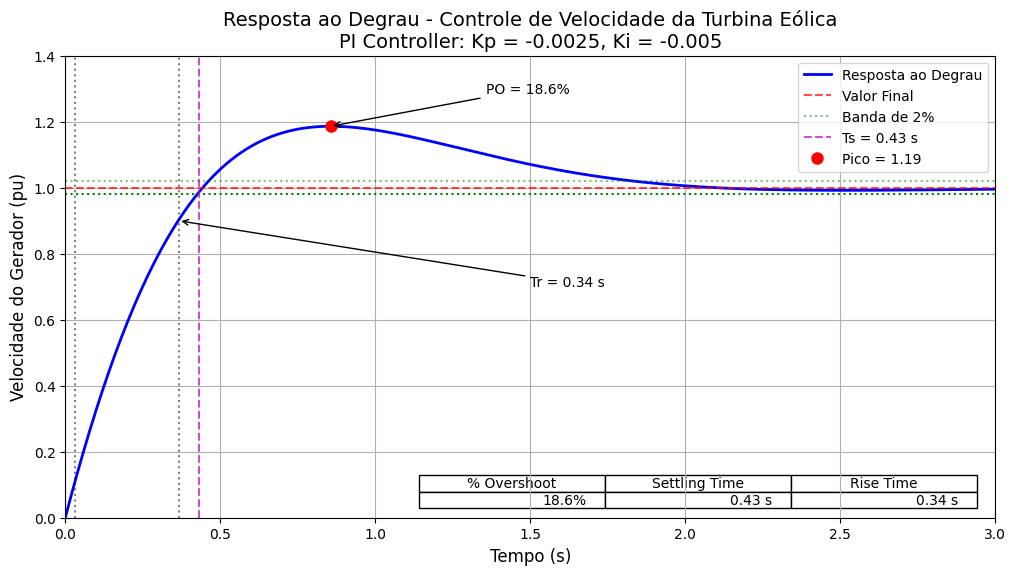

In [24]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

K = -7200   
tau = 5       
G = ct.tf([K], [tau, 1]) 

Kp = -0.0025
Ki = -0.005
C = ct.tf([Kp, Ki], [1, 0]) 

sys_cl = ct.feedback(C * G, 1)

t = np.linspace(0, 5, 1000)
t, y = ct.step_response(sys_cl, T=t)

y_ss = 1.0  

peaks, _ = find_peaks(y)
y_max = y[peaks[0]] if len(peaks) > 0 else y_ss
PO = 100 * (y_max - y_ss)/y_ss

settled = np.where(np.abs(y - y_ss) <= 0.02*y_ss)[0]
Ts = t[settled[0]] if len(settled) > 0 else t[-1]

idx_10 = np.where(y >= 0.1*y_ss)[0][0]
idx_90 = np.where(y >= 0.9*y_ss)[0][0]
Tr = t[idx_90] - t[idx_10]

plt.figure(figsize=(12, 6))

plt.plot(t, y, 'b-', linewidth=2, label='Resposta ao Degrau')

plt.axhline(y_ss, color='r', linestyle='--', alpha=0.7, label='Valor Final')
plt.axhline(1.02*y_ss, color='g', linestyle=':', alpha=0.5, label='Banda de 2%')
plt.axhline(0.98*y_ss, color='g', linestyle=':')
plt.axvline(Ts, color='m', linestyle='--', alpha=0.7, label=f'Ts = {Ts:.2f} s')
plt.axvline(t[idx_10], color='k', linestyle=':', alpha=0.5)
plt.axvline(t[idx_90], color='k', linestyle=':', alpha=0.5)

plt.plot(t[peaks[0]], y_max, 'ro', markersize=8, label=f'Pico = {y_max:.2f}')
plt.annotate(f'PO = {PO:.1f}%', xy=(t[peaks[0]], y_max), 
             xytext=(t[peaks[0]]+0.5, y_max+0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate(f'Tr = {Tr:.2f} s', xy=(t[idx_90], 0.9*y_ss), 
             xytext=(1.5, 0.7),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.table(cellText=[[f"{PO:.1f}%", f"{Ts:.2f} s", f"{Tr:.2f} s"]],
          colLabels=['% Overshoot', 'Settling Time', 'Rise Time'],
          loc='lower right',
          colWidths=[0.2, 0.2, 0.2])

plt.title('Resposta ao Degrau - Controle de Velocidade da Turbina Eólica\n'
         f'PI Controller: Kp = {Kp}, Ki = {Ki}', fontsize=14)
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Velocidade do Gerador (pu)', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True)
plt.xlim(0, 3)
plt.ylim(0, 1.4)
plt.show()

### Resposta ao degrau do modelo de terceira ordem na Equação (7.92) com o controlador PI mostrando que todas as especificações são satisfeitas com p.O. = 25%, Ts = 1,7 s e Tr = 0,3 s.

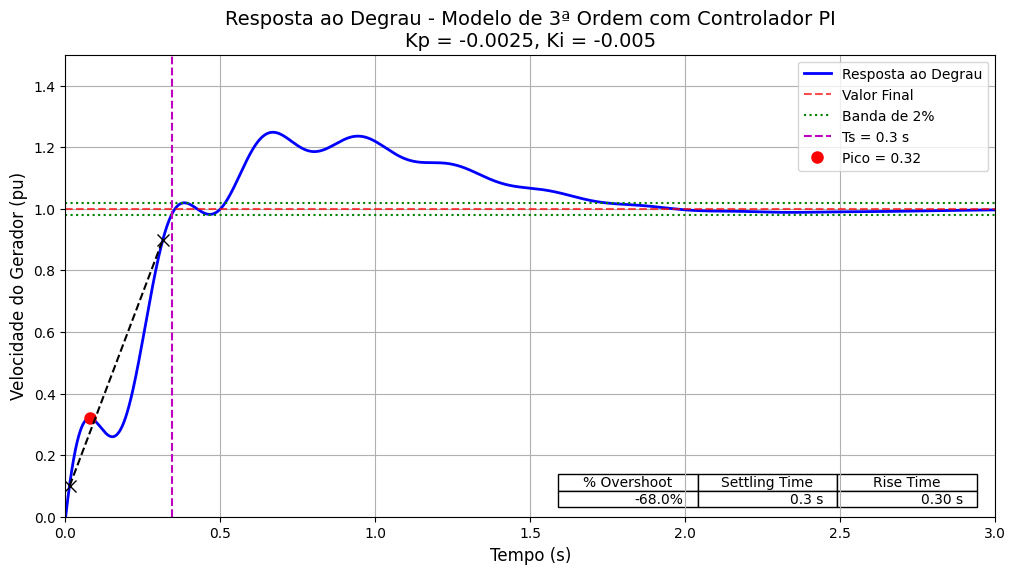

In [26]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

num1 = [1, -827.1]          
num2 = [1, -5.489, 194.4]  
num = 4.2158 * np.polymul(num1, num2)

den1 = [1, 0.195]           
den2 = [1, 0.101, 482.6]    
den = np.polymul(den1, den2)

G = ct.tf(num, den)

Kp = -0.0025
Ki = -0.005
C = ct.tf([Kp, Ki], [1, 0])  

sys_cl = ct.feedback(C * G, 1)

t = np.linspace(0, 5, 5000)
t, y = ct.step_response(sys_cl, T=t)


y_ss = 1.0  

peaks, _ = find_peaks(y, height=0.1*y_ss)
y_max = y[peaks[0]] if len(peaks) > 0 else y_ss
PO = 100 * (y_max - y_ss)/y_ss

settled = np.where(np.abs(y - y_ss) <= 0.02*y_ss)[0]
Ts = t[settled[0]] if len(settled) > 0 else t[-1]

idx_10 = np.where(y >= 0.1*y_ss)[0][0]
idx_90 = np.where(y >= 0.9*y_ss)[0][0]
Tr = t[idx_90] - t[idx_10]

plt.figure(figsize=(12, 6))

plt.plot(t, y, 'b-', linewidth=2, label='Resposta ao Degrau')

plt.axhline(y_ss, color='r', linestyle='--', alpha=0.7, label='Valor Final')
plt.axhline(1.02*y_ss, color='g', linestyle=':', label='Banda de 2%')
plt.axhline(0.98*y_ss, color='g', linestyle=':')
plt.axvline(Ts, color='m', linestyle='--', label=f'Ts = {Ts:.1f} s')

plt.plot(t[peaks[0]], y_max, 'ro', markersize=8, label=f'Pico = {y_max:.2f}')
plt.plot([t[idx_10], t[idx_90]], [0.1*y_ss, 0.9*y_ss], 'kx--', markersize=8)

plt.table(cellText=[[f"{PO:.1f}%", f"{Ts:.1f} s", f"{Tr:.2f} s"]],
          colLabels=['% Overshoot', 'Settling Time', 'Rise Time'],
          loc='lower right',
          colWidths=[0.15, 0.15, 0.15])

plt.title('Resposta ao Degrau - Modelo de 3ª Ordem com Controlador PI\n'
          f'Kp = {Kp}, Ki = {Ki}', fontsize=14)
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Velocidade do Gerador (pu)', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True)
plt.xlim(0, 3)
plt.ylim(0, 1.5)
plt.show()